<a href="https://colab.research.google.com/github/CandidoJr209/Autoencoders/blob/main/FMNIST_Conv_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, Conv2DTranspose, MaxPooling2D
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, _),(x_test, _) = fashion_mnist.load_data()

In [ ]:
plt.imshow(x_test[0], cmap='gray')

In [5]:
# Get image size
size_image = np.prod(x_train.shape[1:])

# Normalize data
x_train = x_train/255
x_test = x_test/255


print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (60000, 28, 28)
x_test shape = (10000, 28, 28)


In [6]:
encoding_dim = 64 # Define the dimentions of the compressed vector

input_img = Input(shape=(28,28,1)) # Define input shape

# Encode
x = Conv2D(32,(1,1),activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32,(1,1),activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

# Decode
x = Conv2DTranspose(32,(3,3),strides=2,activation='relu',padding='same')(x)
x = Conv2DTranspose(32,(3,3),strides=2,activation='relu',padding='same')(x)
x = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

autoencoder = Model(input_img, x)

In [7]:
autoencoder.compile(optimizer="adam", loss="categorical_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        9248  

In [8]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 47s 16ms/step - loss: 25.1681 - val_loss: 23.2340
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 23.1811 - val_loss: 23.1062
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 22.9445 - val_loss: 23.0624
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 23.0222 - val_loss: 23.0381
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 22.9501 - val_loss: 23.0229
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 23.0025 - val_loss: 23.0173
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 22.9322 - val_loss: 23.0103
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 22.8474 - val_loss: 22.9996
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 22.8823 - val_loss: 22.9925
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - lo

In [10]:
encoded_img = autoencoder.predict(x_test)

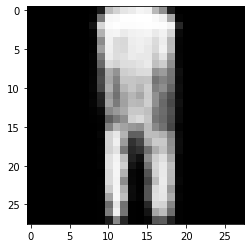

In [17]:
plt.imshow(encoded_img[3].reshape(28,28), cmap='gray')